Improving Predictions with Data Augmentation

Looking at the ResNet-18 Baseline Performance

- Loading a model from the PyTorch Hub: https://pytorch.org/docs/stable/hub.html

In [3]:
%load_ext watermark
%watermark -p torch,lightning,torchvision

torch      : 2.5.1
lightning  : 2.4.0
torchvision: 0.20.1



In [4]:
import lightning as L
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np

from shared_utilities import LightningModel,Cifar10DataModule, plot_loss_and_acc

In [5]:
entrypoints = torch.hub.list('pytorch/vision', force_reload=True)
for e in entrypoints:
    if "resnet" in e:
        print(e)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /Users/fabiomar/.cache/torch/hub/main.zip


deeplabv3_resnet101
deeplabv3_resnet50
fcn_resnet101
fcn_resnet50
resnet101
resnet152
resnet18
resnet34
resnet50
wide_resnet101_2
wide_resnet50_2


In [6]:
pytorch_model = torch.hub.load('pytorch/vision', 'resnet18', weights=None)

Using cache found in /Users/fabiomar/.cache/torch/hub/pytorch_vision_main


In [7]:
L.pytorch.seed_everything(123)
dm = Cifar10DataModule(batch_size=64)
dm.prepare_data()
dm.setup()

Seed set to 123


Files already downloaded and verified


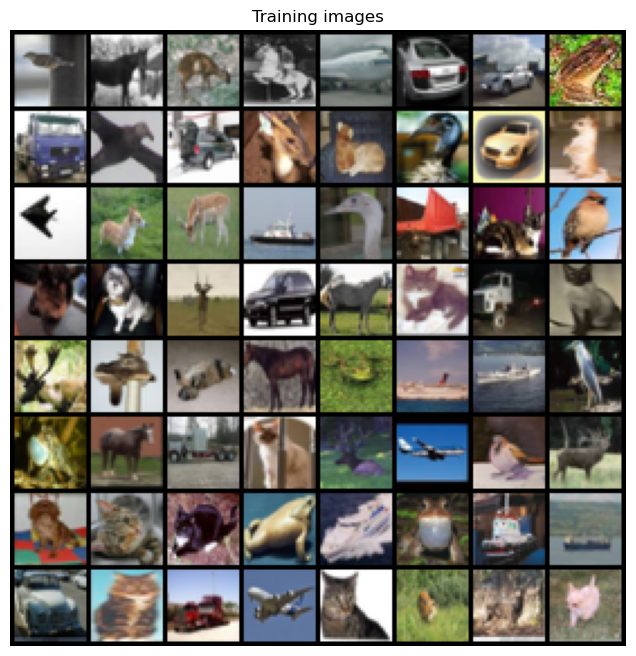

In [8]:
for images, labels in dm.train_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

In [9]:
images[0].shape

torch.Size([3, 32, 32])

- However, the ResNet18 model is designed for 224x224 images (https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html).

In [10]:
%%capture --no-display

L.seed_everything(123)
dm = Cifar10DataModule(height_width=(128, 128), num_workers=4) # to make it train faster

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.1)

trainer = L.Trainer(
    max_epochs=50,
    accelerator="gpu",
    devices=1,
    logger=CSVLogger(save_dir="logs/", name="my-model"),
    deterministic=True,
)

Seed set to 123
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model=lightning_model, datamodule=dm)

Files already downloaded and verified



  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | ResNet             | 11.7 M | train
1 | train_acc | MulticlassAccuracy | 0      | train
2 | val_acc   | MulticlassAccuracy | 0      | train
3 | test_acc  | MulticlassAccuracy | 0      | train
---------------------------------------------------------
11.7 M    Trainable params
0         Non-trainable params
11.7 M    Total params
46.758    Total estimated model params size (MB)
71        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

python(64458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation: |          | 0/? [00:00<?, ?it/s]

python(64489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation: |          | 0/? [00:00<?, ?it/s]

python(64708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation: |          | 0/? [00:00<?, ?it/s]

python(64828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation: |          | 0/? [00:00<?, ?it/s]

python(65045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation: |          | 0/? [00:00<?, ?it/s]

python(65166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x12d1bfb00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1604

Validation: |          | 0/? [00:00<?, ?it/s]

python(65626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


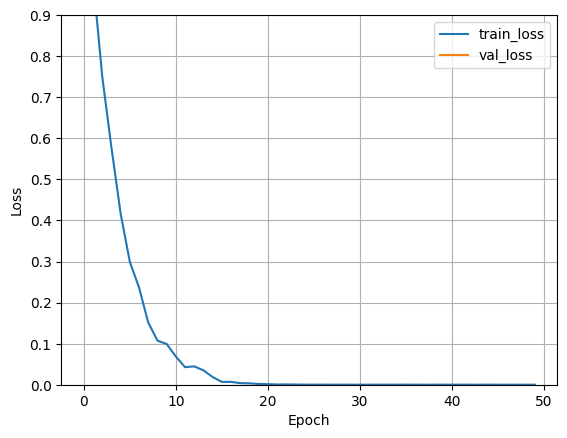

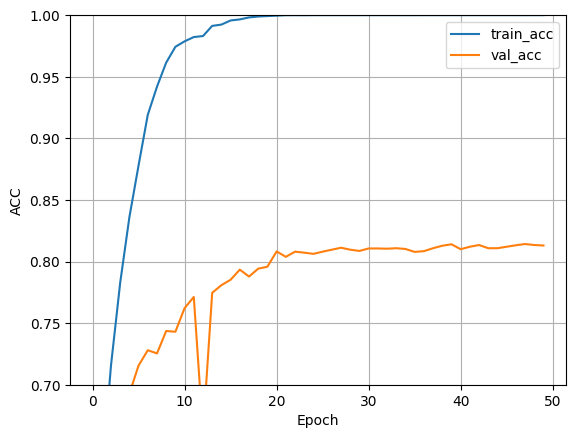

In [10]:
plot_loss_and_acc(trainer.logger.log_dir)

In [11]:
trainer.test(model=lightning_model, datamodule=dm)

Files already downloaded and verified


You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │          0.8125           │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.8125}]